In [28]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import PIL

Q NO 1

In [30]:
from PIL import Image

In [31]:
dog_img=Image.open('dogs.jpeg')

In [32]:
arr=np.array(dog_img)
arr.shape

(185, 272, 3)

Q NO 2

In [33]:
print('Dimensions of image:')
dog_img.height,dog_img.width

Dimensions of image:


(185, 272)

In [34]:
arr

array([[[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[240, 240, 240],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[252, 248, 249],
        [254, 250, 251],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[247, 245, 246],
        [250, 248, 249],
        [255, 253, 254],
        ...,
        [255, 255, 255],
        [252, 252, 252],
        [244, 244, 244]],

       [[253, 251, 254],
        [253, 251, 254],
        [253, 251, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [35]:
new_array = arr.transpose(2,0,1).reshape(3,-1)
new_array=new_array.transpose()
new_array

array([[240, 240, 240],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [254, 254, 254],
       [254, 254, 254],
       [254, 254, 254]], dtype=uint8)

Q NO 3

In [36]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)

In [37]:
km.fit(new_array)

KMeans(n_clusters=3)

In [38]:
print('Cluster centroids')
cluster_centroid=km.cluster_centers_
cluster_centroid

Cluster centroids


array([[251.61148563, 247.87125551, 243.40960008],
       [ 29.61492244,  21.66517369,  20.54522613],
       [210.92436701, 175.27249043, 144.24692665]])

Q NO 4

In [39]:
print('Elemnts of clusters')
cluster_labels=km.labels_
cluster_labels

Elemnts of clusters


array([0, 0, 0, ..., 0, 0, 0])

In [40]:
df = pd.DataFrame(new_array, columns=["col1", "col2", "col3"])
df["cluster"] = km.labels_
print(df.head())

   col1  col2  col3  cluster
0   240   240   240        0
1   255   255   255        0
2   255   255   255        0
3   251   251   251        0
4   255   255   255        0


In [41]:
df['cluster'].value_counts()

0    19734
1    18303
2    12283
Name: cluster, dtype: int64

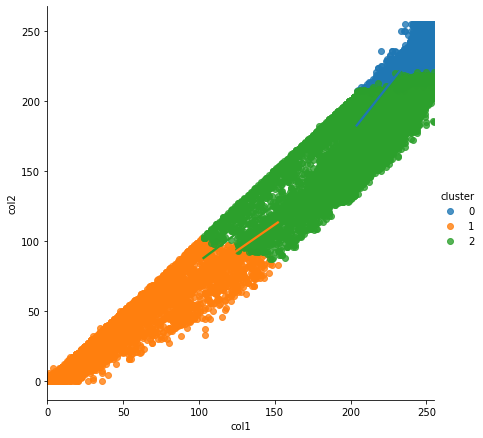

In [42]:
sns.lmplot(x='col1',y='col2', data=df, hue="cluster",height=6)

In [43]:
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)
X_compressed = X_compressed.reshape(
    arr.shape[0], arr.shape[1], arr.shape[2])

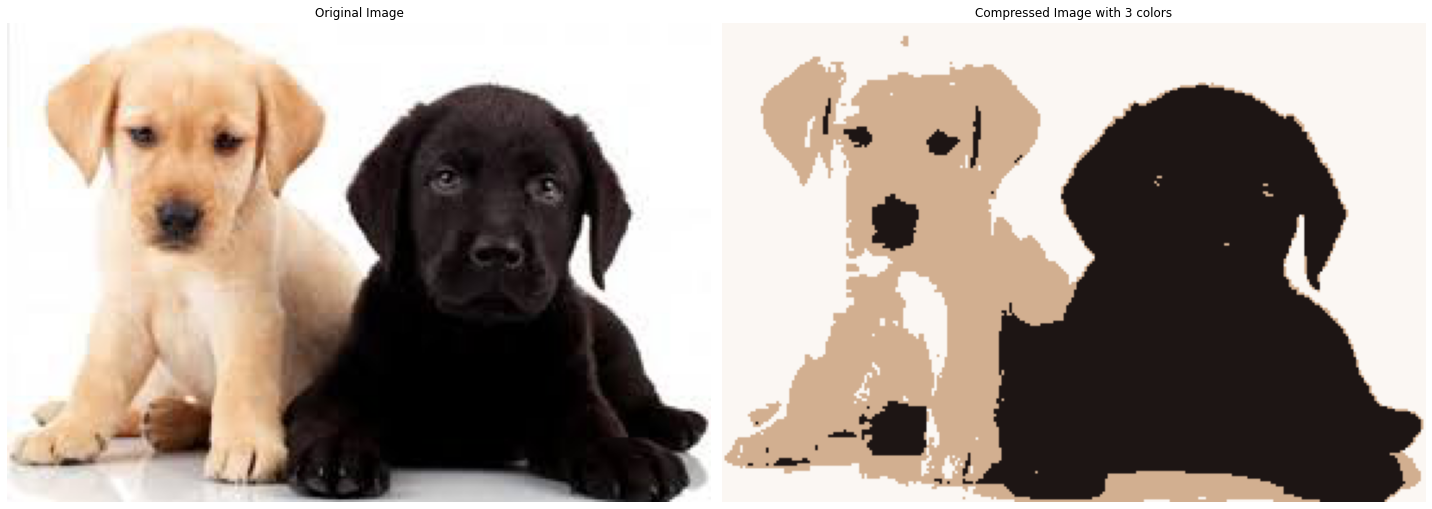

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].imshow(dog_img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 3 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

Q NO 4

In [45]:
centroid_colors = km.cluster_centers_.astype(int)
centroid_colors

array([[251, 247, 243],
       [ 29,  21,  20],
       [210, 175, 144]])

In [46]:
def imagegen(rgb):
    return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))

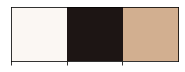

In [47]:
centroid_colors = km.cluster_centers_.astype(int)
colours = [imagegen(color) for color in centroid_colors]

sns.palplot(colours)
plt.show()

END